In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Code-smell-severity-classification-main/Datasets/merged dataset_FE_LM_GC_DC_class balancer.csv',
                    sep=',', encoding='iso-8859-1')

In [11]:
import warnings
warnings.filterwarnings("ignore")

## **PREDICTOR AND TARGET ATTRIBUTES**

In [12]:
predictors_chi_norm30 = df.iloc[:, [10,14,15,19,25,27,30,31,33,34,36,37,38,39,40,41,43,45,46,53,56,60,62,63,64]].values

binary_target = df.iloc[:, 5].values
multiclass_target = df.iloc[:, 7].values

# **Binary Code Smell Detection**

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       134
         1.0       0.93      0.97      0.95       114

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



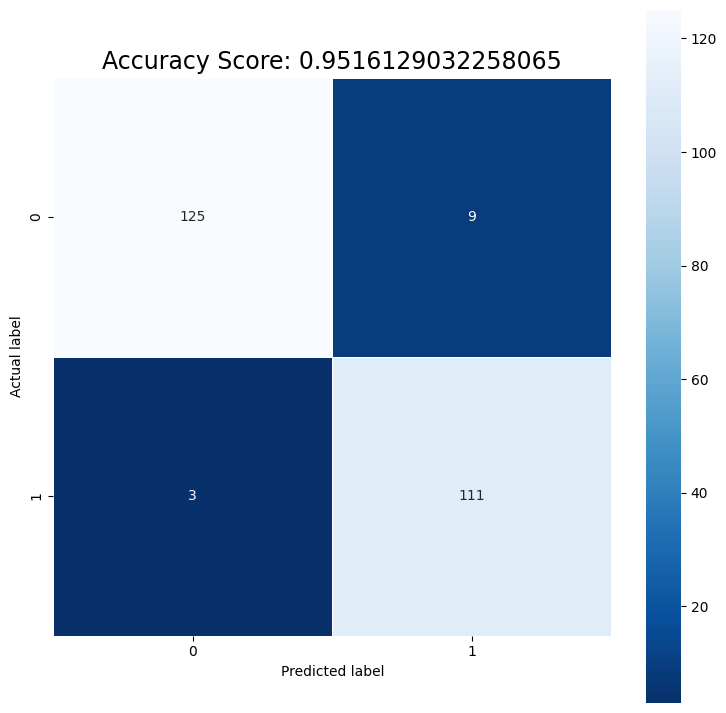

In [14]:
predictors_array = predictors_chi_norm30
r = 42

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(predictors_array, binary_target, test_size = 0.3, random_state = r)
x_train_multiclass, x_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(predictors_array, multiclass_target, test_size = 0.3, random_state = r)


# Define the detector model
detector = XGBClassifier(random_state=r, verbosity=0, booster='gbtree', grow_policy='lossguide', learning_rate=0.061380987690824756, max_depth=9,
                         n_estimators=229, tree_method='approx')

detector.fit(x_train_binary, y_train_binary)
predictions_detector = detector.predict(x_test_binary)


cm = confusion_matrix(y_test_binary, predictions_detector)

print(classification_report(y_test_binary, predictions_detector))

score = detector.score(x_test_binary, y_test_binary)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **Exclude instances of no-smell from the training and test sets**


In [15]:
finish = False
while (finish == False):
  try:
    max = x_train_multiclass.shape[0]
    # Exclude instances of no-smell from the training set (targets)
    for i in range(0, max):
      if (y_train_multiclass[i] == 0):
        y_train_multiclass = np.delete(y_train_multiclass, i, axis = 0)
        x_train_multiclass = np.delete(x_train_multiclass, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the y_train set!")
  except:
    finish == False


finish = False
while (finish == False):
  try:
    max = x_test_multiclass.shape[0]
    # Exclude instances of no-smell from the test set (predictors)
    for i in range(0, max):
      if (y_test_multiclass[i] == 0):
        y_test_multiclass = np.delete(y_test_multiclass, i, axis = 0)
        x_test_multiclass = np.delete(x_test_multiclass, i, axis = 0)
        i = 0
        max = max - 1
    finish = True
    print("The deletion is over in the x_train set!")
  except:
    finish = False

The deletion is over in the y_train set!
The deletion is over in the x_train set!


# Prepare training and test set for applying XGBoost

In [16]:
for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 1.0:
      y_train_multiclass[j]= 0.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 1.0:
      y_test_multiclass[j]= 0.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 2.0:
      y_train_multiclass[j]= 1.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 2.0:
      y_test_multiclass[j]= 1.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 3.0:
      y_train_multiclass[j]= 2.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 3.0:
      y_test_multiclass[j]= 2.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 4.0:
      y_train_multiclass[j]= 3.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 4.0:
      y_test_multiclass[j]= 3.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 5.0:
      y_train_multiclass[j]= 4.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 5.0:
      y_test_multiclass[j]= 4.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 6.0:
      y_train_multiclass[j]= 5.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 6.0:
      y_test_multiclass[j]= 5.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 7.0:
      y_train_multiclass[j]= 6.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 7.0:
      y_test_multiclass[j]= 6.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 8.0:
      y_train_multiclass[j]= 7.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 8.0:
      y_test_multiclass[j]= 7.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 9.0:
      y_train_multiclass[j]= 8.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 9.0:
      y_test_multiclass[j]= 8.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 10.0:
      y_train_multiclass[j]= 9.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 10.0:
      y_test_multiclass[j]= 9.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 11.0:
      y_train_multiclass[j]= 10.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 11.0:
      y_test_multiclass[j]= 10.0

for j in range(len(y_train_multiclass)):
    if y_train_multiclass[j] == 12.0:
      y_train_multiclass[j]= 11.0

for j in range(len(y_test_multiclass)):
    if y_test_multiclass[j] == 12.0:
      y_test_multiclass[j]= 11.0

# **Code Smell Severity Classification with three ensemble method**


# **OVERSAMPLING BORDERLINESMOTE**

In [17]:
pip install imbalanced-learn

In [18]:
from imblearn.over_sampling import BorderlineSMOTE

# OverSampling
sm = BorderlineSMOTE(random_state=42)
x_train_multiclass_res, y_train_multiclass_res = sm.fit_resample(x_train_multiclass, y_train_multiclass)

# **RANDOM FOREST**

# **Randomized**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BoderlineSMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': np.arange(50, 1000, 2),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(1, 20, 1),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BayesSearch**

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'entropy', 18, None, 1, 2, 1000] before, using random point [False, 'entropy', 17, 'log2', 10, 2, 805]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 'entropy', 20, None, 1, 2, 1000] before, using random point [False, 'gini', 17, 'sqrt', 11, 7, 280]
  warnings.warn(


OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 16), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)]);99.67;72.81
              precision    recall  f1-score   support

         1.0       0.50      0.33      0.40         3
         2.0       0.70      0.88      0.78         8
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         2
         5.0       0.83      0.83      0.83        24
         6.0       0.78      0.88      0.82         8
         7.0       0.36      0.57      0.44         7
         8.0       0.75      0.50      0.60        18
         9.0       0.62      0.83      0.71         6
        10.0       1.00      0.50      0.67         2
        11.0       0.83      0.50      0.62        10
        12.0       0.83      1.00      0.91        24

    accuracy                           0.73       114
   macro avg       0.60      0.57      0.57       1

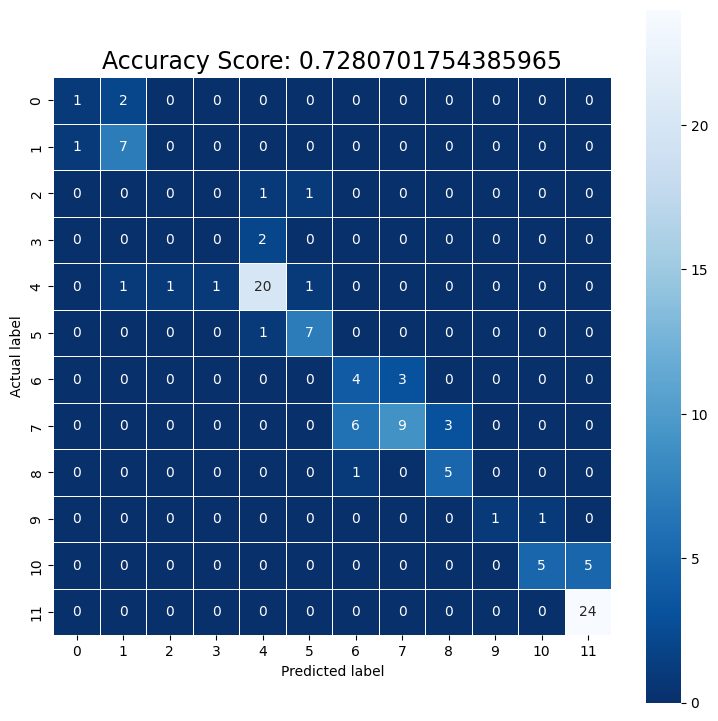

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'n_estimators': Integer(50, 1000),
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'bootstrap': [True, False]
}

# Configure RandomizedSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
bayes_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = bayes_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = bayes_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **EXTREME GRADIENTE BOOSTING (XGBOOST)**

# **Randomized**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BoderlineSMOTE**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': np.arange(50, 1000, 2),
    'max_depth': np.arange(1, 20, 1),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : np.linspace(0.01, 0.5, 30)
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xg, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass_res, y_train_multiclass_res)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_

y_pred_test = best_estimator.predict(x_test_multiclass)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

y_pred_train = best_estimator.predict(x_train_multiclass_res)
accuracy_train = accuracy_score(y_train_multiclass_res, y_pred_train)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **BayesSearch**

In [ ]:
pip install scikit-optimize

OrderedDict([('booster', 'dart'), ('grow_policy', 'depthwise'), ('learning_rate', 0.13836032971146436), ('max_depth', 1), ('n_estimators', 155), ('objective', 'multi:softprob'), ('tree_method', 'hist')]);96.66;71.93
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.83      0.83      0.83        24
         4.0       0.88      0.88      0.88         8
         5.0       0.33      0.43      0.38         7
         6.0       0.64      0.39      0.48        18
         7.0       0.36      0.67      0.47         6
         8.0       1.00      0.50      0.67         2
         9.0       0.75      0.60      0.67        10
        10.0       0.85      0.96      0.90        24

    accuracy                           0.72       114
   macro avg       0.59      0.57      0.56       114
weighted avg       0.72   

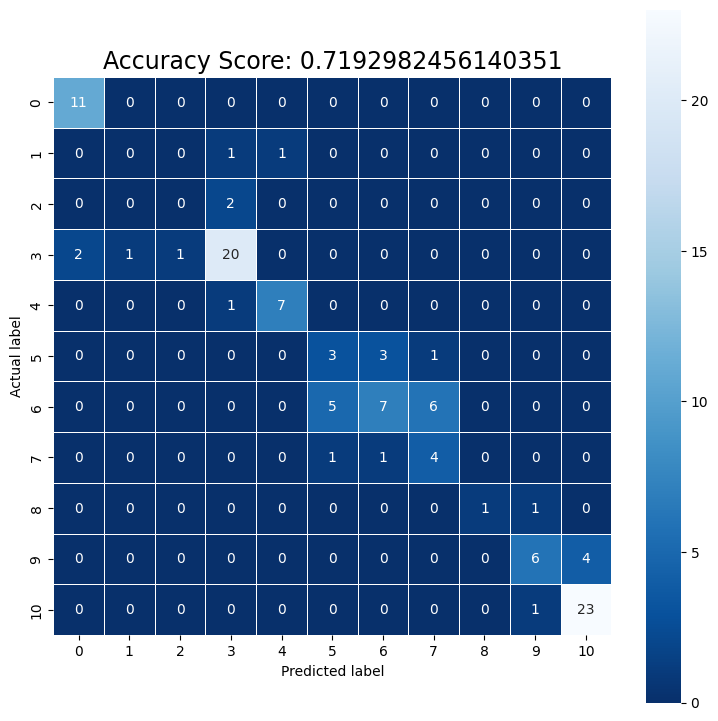

In [ ]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the XGBoost model
xg = XGBClassifier(num_class=12, random_state=42)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['multi:softprob', 'multi:softmax'],
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 20),
    'booster' : ['gbtree', 'dart'],
    'tree_method' : ['approx', 'hist'],
    'grow_policy' : ['depthwise', 'lossguide'],
    'learning_rate' : Real(0.01, 0.5)
}

# Configure RandomizedSearchCV
bayes_search = BayesSearchCV(estimator=xg, search_spaces=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
bayes_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = bayes_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = bayes_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

# **CATEGORICAL BOOSTING (CATBOOST)**

In [ ]:
pip install catboost

# **Randomized**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the CatBoost model
cat = CatBoostClassifier(task_type='CPU', thread_count=-1, random_state = 42, verbose=False, classes_count=12)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['MultiClass', 'MultiClassOneVsAll'],
    'iterations': np.arange(50, 1000, 2),
    'depth': np.arange(1, 16, 1),
    'learning_rate': np.linspace(0.01, 0.5, 30),
    'l2_leaf_reg': np.arange(1, 10, 1),
    'border_count': np.arange(32, 256, 16),
    'feature_border_type' : ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy'],
    'leaf_estimation_method' : ['Newton', 'Gradient'],
    'auto_class_weights' : ['Balanced', 'SqrtBalanced'],
    'grow_policy' : ['SymmetricTree', 'Lossguide', 'Depthwise'],
    'bootstrap_type' : ['Bayesian', 'Bernoulli', 'MVS', 'No']
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=cat, param_distributions=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
random_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = random_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = random_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

# **BayesSearch**

In [ ]:
pip install scikit-optimize

In [ ]:
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the CatBoost model
cat = CatBoostClassifier(task_type='CPU', thread_count=-1, random_state = 42, verbose=False, classes_count=12)

# Define the hyperparameter grid for the search
param_dist = {
    'objective': ['MultiClass', 'MultiClassOneVsAll'],
    'iterations': Integer(50, 1000),
    'depth': Integer(1, 16),
    'learning_rate': Real(0.01, 0.5, 30),
    'l2_leaf_reg': Integer(1, 10),
    'border_count': Integer(32, 256),
    'feature_border_type' : ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy'],
    'leaf_estimation_method' : ['Newton', 'Gradient'],
    'auto_class_weights' : ['Balanced', 'SqrtBalanced'],
    'grow_policy' : ['SymmetricTree', 'Lossguide', 'Depthwise'],
    'bootstrap_type' : ['Bayesian', 'Bernoulli', 'MVS', 'No']
}

# Configure RandomizedSearchCV
bayes_search = BayesSearchCV(estimator=cat, search_spaces=param_dist, scoring='f1_macro', n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Adjust the model
bayes_search.fit(x_train_multiclass, y_train_multiclass)

# Best hyperparameter combination
best_params = bayes_search.best_params_

# Evaluate the optimized model on the test set
best_estimator = bayes_search.best_estimator_
y_pred_test = best_estimator.predict(x_test_multiclass)
y_pred_train = best_estimator.predict(x_train_multiclass)
accuracy_train = accuracy_score(y_train_multiclass, y_pred_train)
accuracy_test = accuracy_score(y_test_multiclass, y_pred_test)

print(f"{best_params};{accuracy_train*100:.2f};{accuracy_test*100:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_multiclass, y_pred_test)

print(classification_report(y_test_multiclass, y_pred_test))

score = best_estimator.score(x_test_multiclass, y_test_multiclass)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()